Enunciado 

Doenças Respiratórias

Ativo: O fumante ativo é quem inala a fumaça do cigarro de maneira direta, ou seja, é a pessoa que realmente fuma. Esse tipo de fumante tem a dependência física e psicológica do tabaco. Um fumante ativo fuma cerca de 18 cigarros por dia.

Ocasional: O fumante ocasional, como o próprio nome sugere, fuma em ocasiões específicas. Ele não é dependente do cigarro, mas, eventualmente, pode fumar, seja numa festa, numa balada, numa viagem.

Passivo: O fumante passivo é aquele que não fuma, mas está exposto ao fumo de outra pessoa, estando assim sujeito aos efeitos nocivos do tabaco. Quando um cigarro é aceso, aproximadamente 2/3 da fumaça é lançada no ambiente e afeta quem está em volta.

Tempo: 
Curto Prazo: 1 a 18 meses
Médio Prazo: 18 a 36 meses
Longo Tempo: 48+

Variaveis:
  Entrada: Fumante[Esporadico, Normal, Compulsivo], tempo [Curto , Médio , Longo ], Tipo [Ativo,Passivo]

  Saida: Risco [Pequeno, Médio, Alto]


Casos: 
 Se: COMPULSIVO, LONGO PRAZO, ATIVO = risco é ALTO
 Se: NORMAL, LONGO PRAZO, ATIVO = risco é ALTO
 Se: EXPORADICO, CURTO PRAZO, PASSIVO = risco é BAIXO
 Se: NORMAL, MÉDIO PRAZO, PASSIVO = risco é MÉDIO




In [1]:
!pip install numpy
!pip install matplotlib
!pip install scikit-fuzzy
!pip install ipympl
!pip install pyqt5

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import skfuzzy.control as ctrl
%matplotlib inline

Gráficos das variáveis:

1. Fumante Gráfico (Unidade de Cigarro)
2. Tempo (Meses)
3. Tipo (Fumante Passivo ou Ativo)



/home/kelvo/.local/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/kelvo/.local/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/kelvo/.local/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


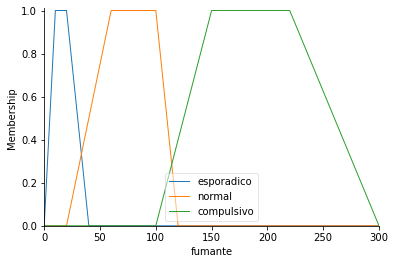

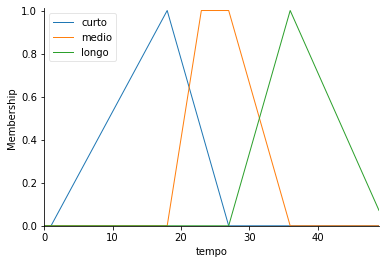

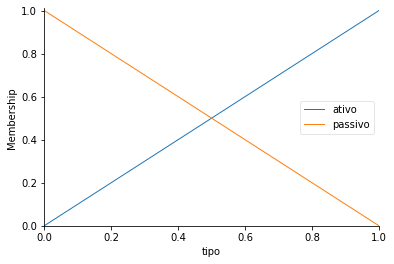

In [4]:
if __name__ == '__main__':
  print('Gráficos das variáveis:\n')

#variáveis de entrada
fumante = ctrl.Antecedent(np.arange(0,301,1), 'fumante')
tempo = ctrl.Antecedent(np.arange(0,50,1), 'tempo')
tipo = ctrl.Antecedent(np.arange(0,2,1), 'tipo')

#variáveis de saída
risco = ctrl.Consequent(np.arange(0,50,1), 'risco')

#variáveis/fuzzyficação
fumante['esporadico'] = fuzz.trapmf(fumante.universe, [0,10,20,40])
fumante['normal'] = fuzz.trapmf(fumante.universe, [20,60,100,120])
fumante['compulsivo'] = fuzz.trapmf(fumante.universe, [100,150,220,300])

tempo['curto'] = fuzz.trimf(tempo.universe, [1,18,27])
tempo['medio'] = fuzz.trapmf(tempo.universe, [18,23,27,36])
tempo['longo'] = fuzz.trimf(tempo.universe, [27,36,50])

tipo['ativo'] = fuzz.trimf(tipo.universe, [1,1,1])
tipo['passivo'] = fuzz.trimf(tipo.universe, [0,0,0])

risco['pequeno'] = fuzz.trapmf(risco.universe, [0,5,10,15]) 
risco['medio'] = fuzz.trimf(risco.universe, [5,20,30])
risco['alto'] = fuzz.trapmf(risco.universe, [20,40,45,50])

print('1. Fumante Gráfico (Unidade de Cigarro)')
print('2. Tempo (Meses)')
print('3. Tipo (Fumante Passivo ou Ativo)\n')
fumante.view()
tempo.view()
tipo.view()
plt.show()

Definição e teste de regras:
----------------------
Valores gerados randomicamente:
Fumante: 197
Tempo: 18
Tipo: 1

Legenda:
Fumante: Número de Cigarros (unidade de cigarro)
Tempo: Período o qual fumou (em meses)
Tipo: Fumante Passivo ou Ativo (0=passivo, 1=ativo)
----------------------
Após avaliação dos valores inseridos...

Seu risco é de: 18.333333333333336
Seu risco é: Médio
----------------------
Exibição Gráfica:



/home/kelvo/.local/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


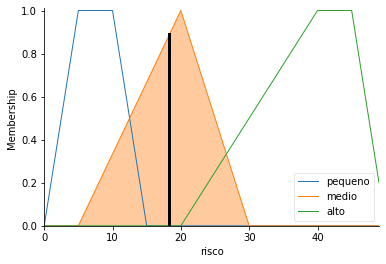

----------------------
Fim dos teste de regra


In [6]:
print('Definição e teste de regras:')

regra1 = ctrl.Rule(fumante['esporadico'] & tempo['curto'] & tipo['ativo'],risco['pequeno'])
regra2 = ctrl.Rule(fumante['normal'] & tempo['curto'] & tipo['ativo'],risco['pequeno'])
regra3 = ctrl.Rule(fumante['compulsivo'] & tempo['curto'] & tipo['ativo'],risco['medio'])
regra4 = ctrl.Rule(fumante['esporadico'] & tempo['medio'] & tipo['ativo'],risco['pequeno'])
regra5 = ctrl.Rule(fumante['normal'] & tempo['medio'] & tipo['ativo'],risco['medio'])
regra6 = ctrl.Rule(fumante['compulsivo'] & tempo['medio'] & tipo['ativo'],risco['alto'])
regra7 = ctrl.Rule(fumante['esporadico'] & tempo['longo'] & tipo['ativo'],risco['medio'])
regra8 = ctrl.Rule(fumante['normal'] & tempo['longo'] & tipo['ativo'],risco['alto'])
regra9 = ctrl.Rule(fumante['compulsivo'] & tempo['longo'] & tipo['ativo'],risco['alto'])
regra10 = ctrl.Rule(fumante['esporadico'] & tempo['curto'] & tipo['passivo'],risco['pequeno'])
regra11 = ctrl.Rule(fumante['normal'] & tempo['curto'] & tipo['passivo'],risco['pequeno'])
regra12 = ctrl.Rule(fumante['compulsivo'] & tempo['curto'] & tipo['passivo'],risco['medio'])
regra13 = ctrl.Rule(fumante['esporadico'] & tempo['medio'] & tipo['passivo'],risco['pequeno'])
regra14 = ctrl.Rule(fumante['normal'] & tempo['medio'] & tipo['passivo'],risco['pequeno'])
regra15 = ctrl.Rule(fumante['compulsivo'] & tempo['medio'] & tipo['passivo'],risco['alto'])
regra16 = ctrl.Rule(fumante['esporadico'] & tempo['longo'] & tipo['passivo'],risco['medio'])
regra17 = ctrl.Rule(fumante['normal'] & tempo['longo'] & tipo['passivo'],risco['alto'])
regra18 = ctrl.Rule(fumante['compulsivo'] & tempo['longo'] & tipo['passivo'],risco['alto'])

print('----------------------')
# criação de números randômicos para teste
print('Valores gerados randomicamente:') 
random_fumante = np.random.randint(0, 300)
random_tempo = np.random.randint(0, 50)
random_tipo = np.random.choice([0,1]) 
print(f"Fumante: {random_fumante}\nTempo: {random_tempo}\nTipo: {random_tipo}\n")
print(f"Legenda:\nFumante: Número de Cigarros (unidade de cigarro)\nTempo: Período o qual fumou (em meses)\nTipo: Fumante Passivo ou Ativo (0=passivo, 1=ativo)")

print('----------------------')
#ativação das regras 
controle_risco = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9, regra10, regra11, regra12, regra13, regra14, regra15, regra16, regra17, regra18])

simulador_risco = ctrl.ControlSystemSimulation(controle_risco)

simulador_risco.input['fumante']=random_fumante
simulador_risco.input['tempo']=random_tempo
simulador_risco.input['tipo']=random_tipo


simulador_risco.compute()

print('Após avaliação dos valores inseridos...\n')
print(f"Seu risco é de: {simulador_risco.output['risco']}")

if simulador_risco.output['risco'] <= 5:
  print('Seu risco é: Pequeno')

if simulador_risco.output['risco'] >5 and simulador_risco.output['risco'] <=15:
  print('Seu risco é: Pequeno para Médio')

if simulador_risco.output['risco'] >15 and simulador_risco.output['risco'] <=20:
  print('Seu risco é: Médio')

if simulador_risco.output['risco'] >20 and simulador_risco.output['risco'] <=30:
  print('Seu risco é: Médio para Alto')

if simulador_risco.output['risco']>=30:
  print('Seu risco é: Alto')

print('----------------------')
print('Exibição Gráfica:\n')
risco.view(sim=simulador_risco)
plt.show()

print('----------------------')
print('Fim dos teste de regra')